In [1]:
import pandas as pd

%matplotlib inline

# Load the data and set the DateTime index
data = pd.read_csv('assets/datasets/rossmann.csv', skipinitialspace=True)

/Users/basilbeirouti/miniconda3/envs/dsienv/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [8]:
store1_data = data[data.Store == 1]

In [9]:
store1_open_data = store1_data[store1_data.Open==1]

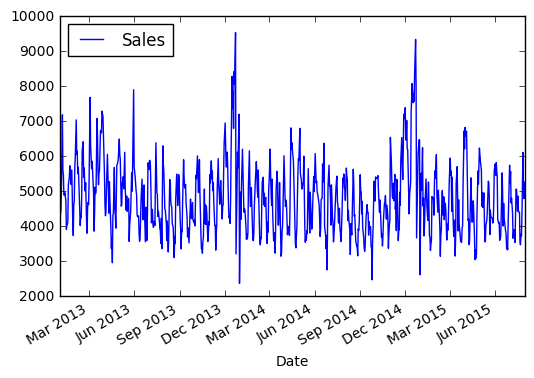

In [10]:
store1_open_data[['Sales']].plot()

In [13]:
print store1_data.Sales.autocorr(lag=1) # -0.12
print store1_data.Sales.autocorr(lag=2) # -0.03

-0.127325143391
-0.0347871557079


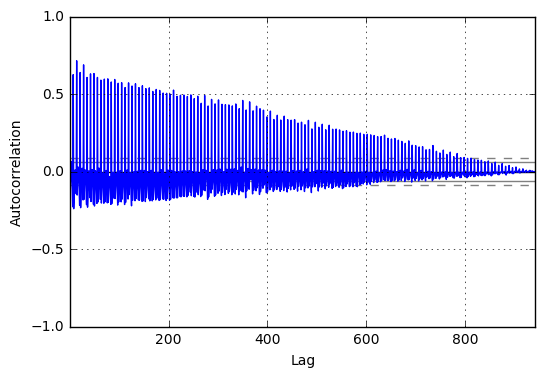

In [14]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1_data.Sales)

In [20]:
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.tsaplots import plot_acf

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Wed, 14 Dec 2016   AIC                          12540.651
Time:                        14:55:12   BIC                          12554.633
Sample:                    07-31-2015   HQIC                         12546.029
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.6173     82.986     57.391      0.000      4599.969  4925.266
ar.L1.Sales     0.6822      0.026     26.122      0.000         0.631     0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

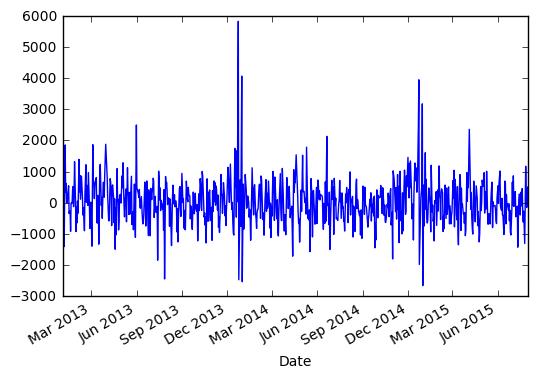

In [17]:
model.resid.plot()

In [18]:
store1_data.Sales[0]

5263

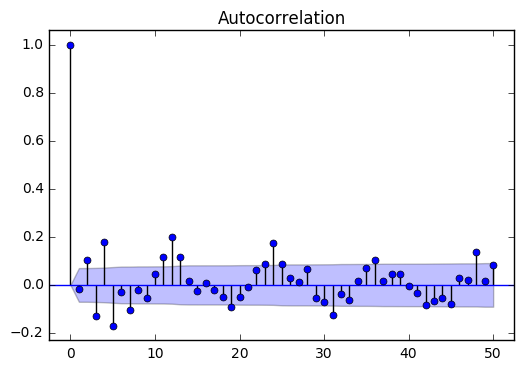

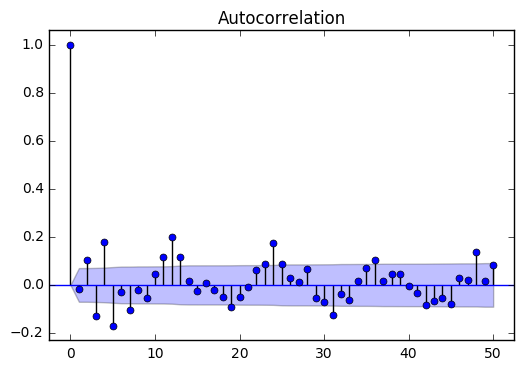

In [21]:
plot_acf(model.resid, lags=50)

In [22]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(store1_sales_data, (2, 0, 2)).fit()
model.summary() 


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 2)   Log Likelihood               -6243.725
Method:                       css-mle   S.D. of innovations            716.957
Date:                Wed, 14 Dec 2016   AIC                          12499.449
Time:                        14:56:47   BIC                          12527.413
Sample:                    07-31-2015   HQIC                         12510.204
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4761.5714     75.652     62.940      0.000      4613.296  4909.847
ar.L1.Sales    -0.2277      0.056     -4.064      0.000        -0.338    -0.118
ar.L2.Sales     0.4689      0.057      8.271      0.000         0.358     0.580
ma.L1.Sales     0.9626      0.062     15.638      0.000         0.842     1.083
ma.L2.Sales     0.2797      0.061      4.613      0.000         0.161     0.399
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2376           +0.0000j            1.2376            0.5000
AR.2            1.7233           +0.0000j            1.7233            0.0000
MA.1           -1.7208           -0.7837j            1.8908           -0.4320
MA.2           -1.7208           +0.7837j            1.8908            0.4320
-----------------------------------------------------------------------------
"""

In [32]:
model = ARIMA(store1_sales_data, (2, 1, 2)).fit()
model.summary()f

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -6247.179
Method:                       css-mle   S.D. of innovations            725.652
Date:                Wed, 14 Dec 2016   AIC                          12506.358
Time:                        15:12:36   BIC                          12534.314
Sample:                    07-30-2015   HQIC                         12517.111
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.5079      0.387      1.313      0.189        -0.250     1.266
ar.L1.D.Sales    -0.1820      0.050     -3.661      0.000        -0.279    -0.085
ar.L2.D.Sales     0.6469      0.035     18.602      0.000         0.579     0.715
ma.L1.D.Sales    -0.1858      0.052     -3.569      0.000        -0.288    -0.084
ma.L2.D.Sales    -0.8142      0.052    -15.659      0.000        -0.916    -0.712
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1106           +0.0000j            1.1106            0.5000
AR.2            1.3920           +0.0000j            1.3920            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.2282           +0.0000j            1.2282            0.5000
-----------------------------------------------------------------------------
"""

In [16]:
from statsmodels.tsa.arima_model import ARMA

store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Wed, 14 Dec 2016   AIC                          12540.651
Time:                        14:53:12   BIC                          12554.633
Sample:                    07-31-2015   HQIC                         12546.029
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.6173     82.986     57.391      0.000      4599.969  4925.266
ar.L1.Sales     0.6822      0.026     26.122      0.000         0.631     0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""